In [1]:
from tfConstrainedGauss import solve_me, random_realistic_cov_mat, \
    random_non_zero_idx_pairs, InputsME, convert_mat_to_mat_non_zero, convert_mat_non_zero_to_mat
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pickle

# Test 8x8 matrix problem with random precision matrix structure and random covariance constraints using MaxEnt approach

### Generate & Save

In [44]:
n = 8

# Non-zero idxs
non_zero_idx_pairs = random_non_zero_idx_pairs(n)

# Random cov mat
cov_mat = random_realistic_cov_mat(n, unit_diag=True)

# Save
with open('data_n8_non_zero_idx_pairs.txt', 'wb') as f:
    pickle.dump(non_zero_idx_pairs, f)

with open('data_n8_cov_mat.npy', 'wb') as f:
    np.save(f, cov_mat)

No non-zero off-diagonal elements: 18 max possible: 28


### Alternate: load existing

In [4]:
# Save
with open('data_n8_non_zero_idx_pairs.txt', 'rb') as f:
    non_zero_idx_pairs = pickle.load(f)

with open('data_n8_cov_mat.npy', 'rb') as f:
    cov_mat = np.load(f)

### Plot

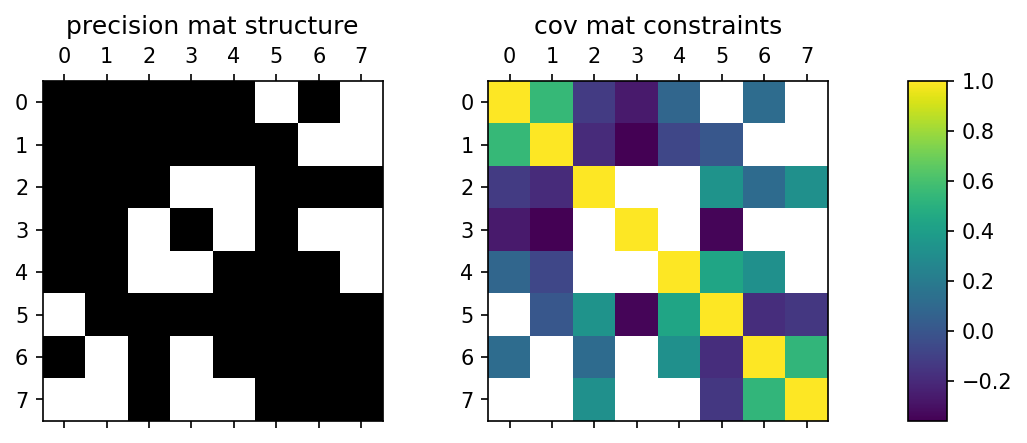

In [45]:
prec_mat_structure = convert_mat_non_zero_to_mat(
    n=n,
    non_zero_idx_pairs=non_zero_idx_pairs,
    mat_non_zero=np.full(len(non_zero_idx_pairs),1.0)
)

clear_cmap = ListedColormap(['white', 'none'])

gridspec = {'width_ratios': [1, 1, 0.1]}
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, gridspec_kw=gridspec, dpi=150)
fig.set_size_inches(8,3)

ax1.matshow(prec_mat_structure,cmap='Greys')
ax1.set_title("precision mat structure")

z2plot = ax2.matshow(cov_mat)
ax2.imshow(prec_mat_structure,cmap=clear_cmap)
ax2.set_title("cov mat constraints")

plt.colorbar(z2plot,cax=ax3)

## Learn

In [46]:
target_cov_mat_non_zero = convert_mat_to_mat_non_zero(
    n=n,
    non_zero_idx_pairs=non_zero_idx_pairs,
    mat=cov_mat
)

inputs = InputsME(
    n=n,
    non_zero_idx_pairs=non_zero_idx_pairs,
    target_cov_mat_non_zero=target_cov_mat_non_zero,
    epochs=300,
    learning_rate=0.01,
    use_weighted_loss=True
)
results = solve_me(inputs)

Prec mat initial guess for non-zero elements [ 1.51961426  1.6397894   1.58341185  1.4449894   1.97978521  2.41085097
  2.01331501  1.6609176   0.33647003 -1.37523012 -0.25737922  0.82622958
 -0.11905948 -0.98476485 -0.8075564  -0.87494581 -0.51302574 -1.03074572
 -0.13507951  0.16584692  0.22983351  0.17726306 -0.23317648  0.88431462
  0.2969527  -0.05596766]
Initial cov mat corresponding non-zero elements [ 1.31560055  1.01883424  2.82775456  2.2883538   3.3697696   3.80003558
  1.42058112  1.37517414 -0.53315531  3.05783627  0.96731555 -2.38933983
  0.39085088  2.67973938  0.63108815  0.9784997   1.09700853  1.23456975
  0.3780868  -0.92321856  0.21061286  0.76088557  1.03814025  0.64300996
  0.05551415  0.77386593]
Using weighted loss functing with weights: [1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 7.8290095e+00 5.1569114e+00
 7.5163170e+01 8.5951529e+00 6.5894492e+03 8.5662727e+00 3.2931030e+00
 3.4741623e+00 

In [41]:
results.report()

----- Results -----
Prec mat initial guess for non-zero elements:
[ 1.35873784  1.39220329  1.12214536  1.15916246  1.39983915  1.31871128
  1.          1.02548625  0.02408938 -0.29899287  0.66359884 -0.18006485
 -0.09167092  0.23762967 -0.23012173 -0.23337481 -0.11470455 -0.26376344
  0.07746927  0.66794051  0.09345237]
-> Learned prec mat non-zero elements:
[ 1.3600034   1.3857466   1.1191272   1.1426879   1.3641372   1.3015494
  1.          1.0239938   0.02413714 -0.28748348  0.6664167  -0.13016537
 -0.07449268  0.22387354 -0.22080222 -0.23479347 -0.11559092 -0.18948759
  0.06637571  0.624852    0.09177139]
Initial cov mat non-zero elements corresponding to initial prec mat guess:
[ 1.00325284  1.0083254   1.00389597  1.01840983  1.04887743  1.02740815
  1.          1.00321028  0.0802709   0.24987841 -0.48797939  0.17112995
  0.1144405  -0.14065022  0.06837347  0.13123596  0.11197054  0.23300446
 -0.13736484 -0.53126695 -0.05825377]
-> Learned cov mat non-zero elements:
[ 0.99946489

## Plot learned covariance matrix constraints

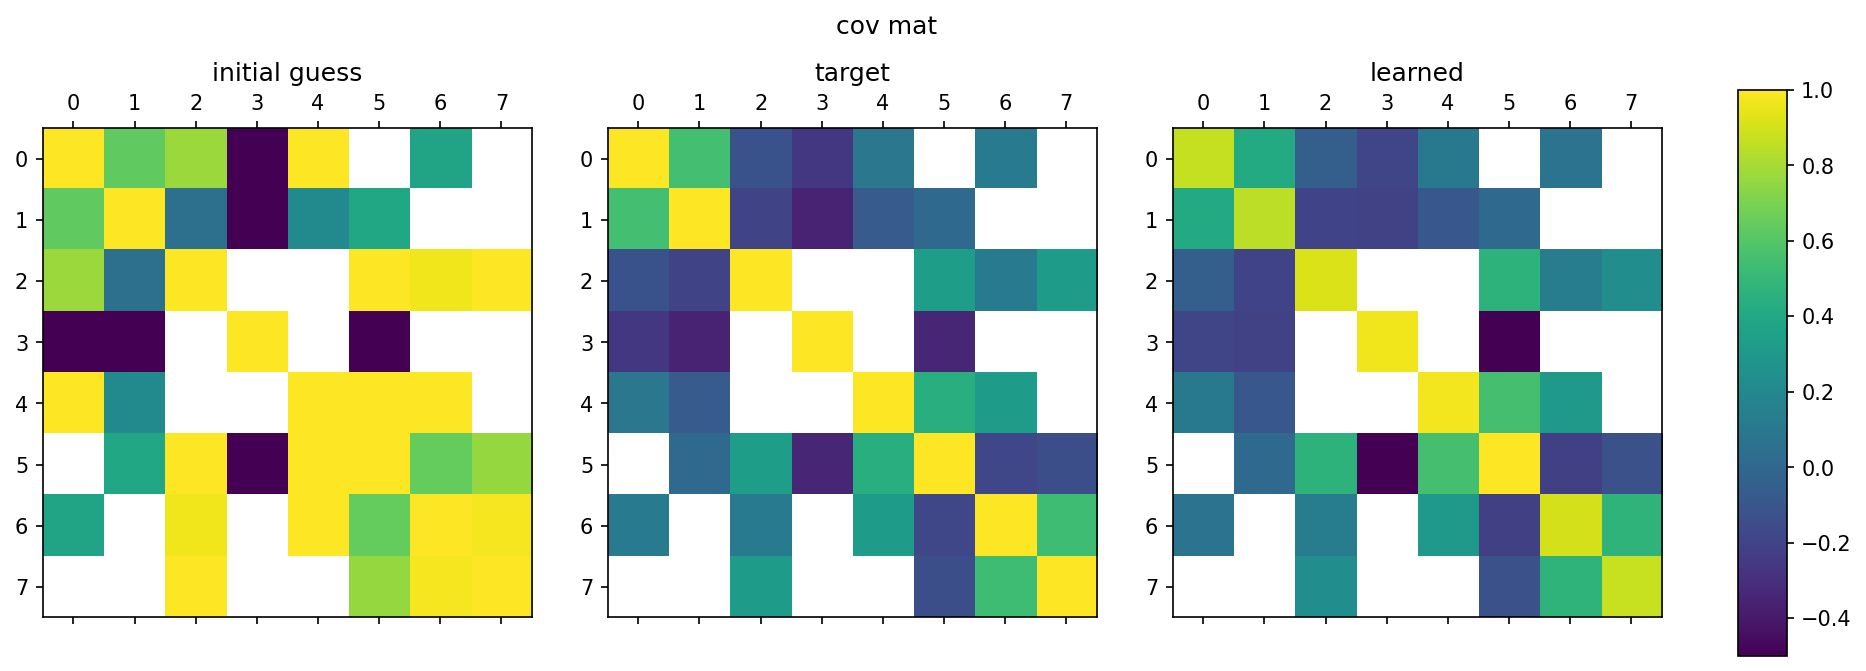

In [47]:
init_cov_mat_reconstructed = convert_mat_non_zero_to_mat(
    n=n,
    non_zero_idx_pairs=non_zero_idx_pairs,
    mat_non_zero=results.init_cov_mat_reconstructed_non_zero
)

low=-0.5
high=1.0

clear_cmap = ListedColormap(['white', 'none'])

gridspec = {'width_ratios': [1, 1, 1, 0.1]}
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, gridspec_kw=gridspec, dpi=150)
fig.set_size_inches(15,5)
fig.suptitle("cov mat")

ax1.matshow(init_cov_mat_reconstructed,vmin=low,vmax=high)
ax1.imshow(prec_mat_structure,cmap=clear_cmap)
ax1.set_title('initial guess')

ax2.matshow(cov_mat,vmin=low,vmax=high)
ax2.imshow(prec_mat_structure,cmap=clear_cmap)
ax2.set_title('target')

z3plot = ax3.matshow(results.learned_cov_mat,vmin=low,vmax=high)
ax3.imshow(prec_mat_structure,cmap=clear_cmap)
ax3.set_title('learned')

plt.colorbar(z3plot,cax=ax4)

## Plot precision matrix learned and it's inverse = full covariance matrix

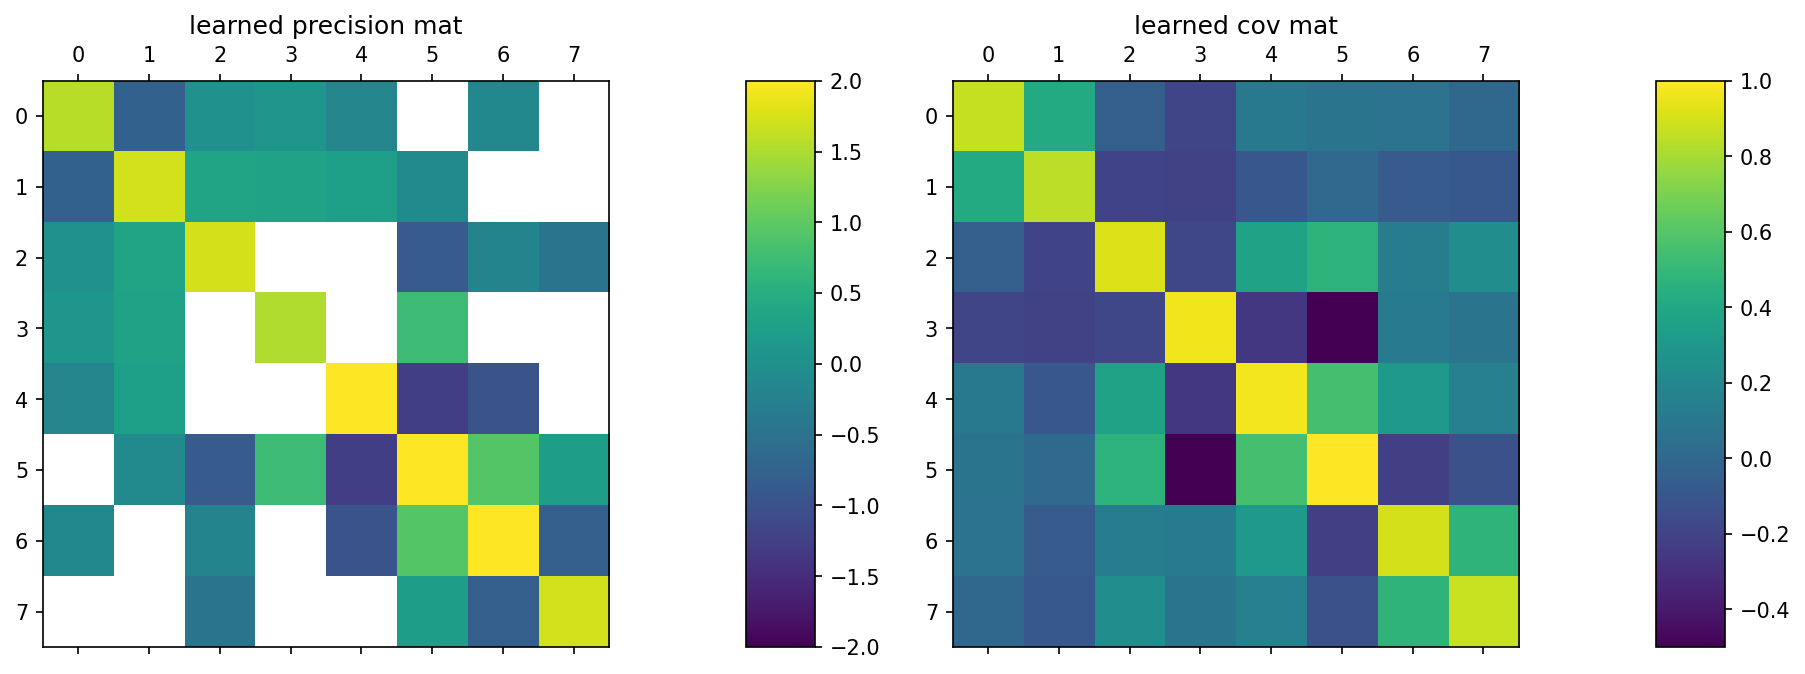

In [53]:
init_cov_mat_reconstructed = convert_mat_non_zero_to_mat(
    n=n,
    non_zero_idx_pairs=non_zero_idx_pairs,
    mat_non_zero=results.init_cov_mat_reconstructed_non_zero
)

clear_cmap = ListedColormap(['white', 'none'])

gridspec = {'width_ratios': [1, 0.1, 1, 0.1]}
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, gridspec_kw=gridspec, dpi=150)
fig.set_size_inches(15,5)

z1plot = ax1.matshow(results.learned_prec_mat,vmin=-2.0,vmax=2.0)
ax1.imshow(prec_mat_structure,cmap=clear_cmap)
ax1.set_title('learned precision mat')

plt.colorbar(z1plot,cax=ax2)

z3plot = ax3.matshow(results.learned_cov_mat,vmin=-0.5,vmax=1.0)
ax3.set_title('learned cov mat')

plt.colorbar(z3plot,cax=ax4)